<center>
<img src="https://benefits.fastfive.co.kr/wp-content/uploads/2017/12/logo_%ED%8C%A8%EC%8A%A4%ED%8A%B8%EC%BA%A0%ED%8D%BC%EC%8A%A4-600x500.png" width="300" height="300"><br>
</center>

파이썬을 활용한 이커머스 데이터분석_강의를 듣고 따라했던 코딩과 요점을 정리하였다.
 - 출처: [fast campus](https://fastcampus.co.kr/?gclid=CjwKCAjwqvyFBhB7EiwAER786a4FhRzvL9JiiOOTS5TL22ZuXVUKWvF6wWni06h-6fIZ5tp1j0J5phoCoHMQAvD_BwE)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/ecommerce.csv')

In [3]:
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


### 컬럼 분석하기
- Email : 소비자 이메일 주소 (종속변수를 예측하는 것에 크게 중요하지 않음.)
- Addres: 소비자 주소(종속변수를 예측하는 것에 크게 중요하지 않음.)
- Avatar: 아바타 (종속변수를 예측하는 것에 크게 중요하지 않음.)
- Avg.SessionLength: 한번 접속해서 얼마나 오래 머물러 있느냐
- Time on App: 어플로 얼마나 시간을 사용했는지
- Time on Website: 웹 사이트 접속 시간
- Length of Membership: 이 고객이 멤버쉽 가입한지 얼마나 되었는지
- Yearly Amount Spent: 이 고객이 연간 얼마나 소비했는지 [**이것이 우리가 예측해야할 종속 변수 이다.**]

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### .info() 명령어를 통해 어떤 데이터의 특성이 있고, 결측치를 확인 할 수 있다.
- Null(결측치)값이 없다.
- Object: 이메일,주소,아바타에 나와있는 Text라고 생각하면 편하다.
- float64: 숫자데이터. 소수점뒤가 존재하는 데이터 

In [7]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### describe() 명령어를 통해 알 수 있는 것

- 데이터의 전반적인 수치들

### 한 컬럼만 불러오기

In [8]:
data['Yearly Amount Spent']

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

### 두가지 컬럼 불러오기 : [ ] 대괄호 추가하고,   ',' 추가

In [9]:
data[['Length of Membership','Yearly Amount Spent']]

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092
...,...,...
495,3.746573,573.847438
496,3.576526,529.049004
497,4.958264,551.620145
498,2.336485,456.469510


### 원하는 컬람만 골라내어 보자.

우리가 앞서 데이터를 살펴볼때, 이메일과 주소 그리고 아바타는 크게 중요하지 않다고 언급했었다. (Yearly Amount Spent 를 예측하는 문제이기에)

그래서 우리는 이메일, 주소, 그리고 아바타는 Drop 시킬 것이다.

In [10]:
data[['Avg. Session Length', 'Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


그 후에, data를 다시 셋팅하자. (기존에 있는 data와 겹친다고 가정하에, 문제가 생길것 같다면 'data' 말고 다른 이름을 써야한다.)

여기서는 그대로 'data'로 진행했다.

In [11]:
data = data[['Avg. Session Length', 'Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]

In [12]:
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


그러면 앞으로 'data' 만 실행하게 되면, 우리가 Drop한 칼럼은 안보이고 우리가 원하는 컬럼만 볼 수 있다.

In [13]:
from sklearn.model_selection import train_test_split

- sklearn을 불러오고, sklearn 안에 있는 하위 모듈인 model_selection 불러오고, 우리가 쓰고자하는 train_test_split을 최종적으로 임포트한다.
- 컴퓨터 메모리상 쓰고자 하는 모듈만 가져오는 것이다.

In [14]:
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


X 는 독립변수, y 는 종속변수 이다. 우리는 지금 X,y 값을 가지고 있지 않다. 우리가 가지고 있는 data의 이름은 data 이다.

- 여기서 종속변수 y 는 Yearly Amount Spent (우리가 예측하고자 하는 컬럼) 이고, X 는 나머지 4개의 컬럼이다.
- 그래서 이름에 맞게 다시 한번 지정해 준다.

In [15]:
X = data[['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']]

In [16]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [17]:
y = data ['Yearly Amount Spent']

In [18]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=100)

위에서 X, y 를 지정해 주었기 때문에 이제, X_train을 불러와 보자.

- test_size는 train data 비율 조절을 해준다. random_state는 실행한값마다 데이터가 랜덤이기때문에 같은 값이 나오지 않는것을  막아준다.

In [20]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
205,34.967610,13.919494,37.952013,5.066697
404,32.278443,12.527472,36.688367,3.531402
337,31.827979,12.461147,37.428997,2.974737
440,33.200616,11.965980,36.831536,3.549036
55,33.925297,11.588655,35.252242,3.392050
...,...,...,...,...
343,32.302748,12.815393,37.957810,4.615426
359,32.054262,13.149670,37.650400,4.195614
323,32.762456,10.952353,37.646292,4.019470
280,32.271848,13.485009,37.550880,3.086337


### 모델링

모델링 파트는 기본적으로 많은 코드를 요구하지는 않고, 모델링을 이해하는데 많은 시간과 에너지가 필요하다.

In [21]:
import statsmodels.api as sm

In [22]:
model = sm.OLS(y_train, X_train)

OLS() 모듈은 (x,y) 중에 y를 먼저 쓰는 모듈로 기억해두자.

- OLS 모듈을 불러온 이유는 추후에, summary()에서 가장 보기좋게 표현을 해준다.

In [23]:
 model = model.fit()

train이 끝난 상태 이다.

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.798e+04
Date:                 Tue, 08 Jun 2021   Prob (F-statistic):                        0.00
Time:                         10:47:52   Log-Likelihood:                         -1820.0
No. Observations:                  400   AIC:                                      3648.
Df Residuals:                      396   BIC:                                      3664.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.9059      0.869     13.696      0.000      10.197      13.615
Time on App             34.3257      1.121     30.610      0.000      32.121      36.530
Time on Website        -14.1405      0.812    -17.405      0.000     -15.738     -12.543
Length of Membership    61.0149      1.144     53.318      0.000      58.765      63.265
==============================================================================
Omnibus:                        0.490   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.606
Skew:                          -0.022   Prob(JB):                        0.739
Kurtosis:                       2.814   Cond. No.                         55.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R-squared, Adj. R-squared, coef, P>|t| (P-value) 란?

.summary() 함수를 사용하고 결과내용을 보자. 이중 중요한 point 3가지 정도를 쉽고 간단하게 설명하려 한다.

- R-squared : 클수록 좋은 모델이다. Adj. R-squared 와 같을 수도 다른 값이 나올 수도 있다.
    - 변수가 많으면 R-squared 값이 높아진다. 그래서  Adj. R-squared 와 같은 개념이 나왔다.  Adj. R-squared 는 변수가 몇개 들어갔는지도 고려해서 그 가중치로 수치를 계산해준다. 예를들어 몇십개의 불필요한 변수가 추가 된다면, R-squared 값은 높아질수 있으나 Adj. R-squared 값은 높아지지 않는다. 모델을 비교 할때는 Adj. R-squared를 비교해주는 것이 더 좋다.
    

-  coef : [변수의 영향력 / 강도와 방향] 쉽게 말하면 직선의 기울기 이다. 예를들어 Avg. Session Length 값이 1증가할때 우리가 예측하려는 값이 11.9059가 증가한다는 뜻이다. 
    - 따라서 coef 값이 크면 민감하고 더 중요한 변수다 라고 말할 수 있지만, 공정한 비교가 안될 수도 있다. (데이터 스케일 자체가 다른 경우에는) 그래서 데이터 스케일을 맞추고 coef를 비교해봐야 한다.
    - 예를 들어 Time on App 와 Time on Website 는 비슷한 특성이다. 그렇기 때문에 Time on App가 조금 더 변수의 영향력이 크다고 할 수 있다.
    
- P-value : 0 ~ 1 에서까지의 값을 가지고 0 근처 값에서 많이 보여진다. 그 기준은 일반적으로 통계학 제시하는 기준은 0.05 이다. 0.05보다 작으면 양호한 수치라고 한다. 그래서 위에 값을 보면 모두 0 이기 때문에 유의미한 값이라고 볼 수 있다. 반대로 0.05보다 그 값이 크다면 이 정보를 신뢰 하기 힘들다. 다시 한번 확인 해봐야 한다. 

### 예측하기



In [25]:
model.predict(X_test)

69     418.211323
29     567.097473
471    534.706617
344    425.690888
54     474.931682
          ...    
460    570.877250
152    564.267305
154    557.093996
56     489.285778
392    550.720695
Length: 100, dtype: float64

.predict() 함수로 예측을 하게되면, 69번째는 418.211323 .. 29번째는 567.097473 이라는 예측값이 나온다. 물론 순서는 랜덤 샘플링으로 인해 뒤섞이게 나온다. 
- 우리는 이것을 y_test와 비교해 볼 수 있다.

In [26]:
y_test

69     451.575685
29     554.722084
471    541.049831
344    442.722892
54     522.404141
          ...    
460    618.845970
152    555.892595
154    595.803819
56     520.898794
392    549.131573
Name: Yearly Amount Spent, Length: 100, dtype: float64

하지만, 이렇게 비교를 하게 되면 예측이 잘 된건지, 잘 안된건지 확인하기 어렵다. 그래서 확인 하는 방법을 알아보겠다. 우선 위에서 한 model.predict(X_test)를 pred 란 이름으로 지정하자.

- 첫번째, 방법은 그림을 그려 시각화로 알아 보는 것이다.

In [27]:
pred = model.predict(X_test)

In [28]:
pred

69     418.211323
29     567.097473
471    534.706617
344    425.690888
54     474.931682
          ...    
460    570.877250
152    564.267305
154    557.093996
56     489.285778
392    550.720695
Length: 100, dtype: float64

<AxesSubplot:xlabel='Yearly Amount Spent'>

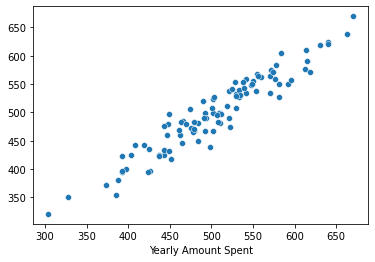

In [29]:
sns.scatterplot(x= y_test, y=pred)

x,y축이 스케일 값은 0에서 650으로 같지만, 간격이 다르다.  그래서 .figure()을 사용해서 맞춰주자.

<AxesSubplot:xlabel='Yearly Amount Spent'>

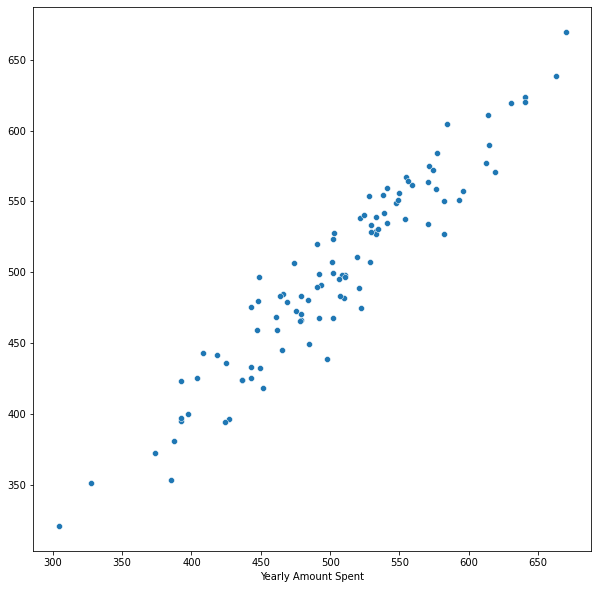

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= y_test, y=pred)

x축 값 실제 데이터값, y축은 예측값이다. 점들을 직선으로 하나로 나타내어 준다면 이 그래프는 직선이 선형적으로 그려질것이고, 예측이 이정도면 잘 된편으로 볼 수 있다. 만약 예측이 잘 안되었다면 점들이 여기저기 찍혀 나타났을 것이다. 완전히 일치하지는 않지만 어느정도 예측이 잘 되었고 다음으로 넘어가자.

#### 이번엔 MSE(Mean Squared Error)로 예측이 잘 되었는지 확인해 보자. 

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mean_squared_error(y_test, pred)

482.28901390889973

 482가 좋은 수치냐, 나쁜 수치냐 알수가 없다. 이것으로 예측이 잘된건지 안된건지는 아직 알 수 없다. **상대적인 숫자** 이다.

#### 이번엔 RMSE(Root Mean Square Error) 로 예측이 잘 되었는지 알아보자. 루트를 씌워보자.

In [33]:
# RMSE
np.sqrt(mean_squared_error(y_test, pred)) #.sqrt는 루트를씌워주는 명령어

21.961079525125804

- 21.96 정도의 값이 RMSE 값이다.
- 위쪽으로 올라가서, .describe() 로 보았던 Yearly Amount Spent의 mean값이 499.xxxx 정도인데 여기서 21정도의 에러가 보인다. 로 해석할 수 있다. (우리의 예측치와 실제 데이터 값이 21 정도의 차이가 난다.)
- 하지만 이 수치도 좋은지 나쁜지 알수 없는 상대적인 수치 이다. ( 좋은지 나쁜지는 알 수 없다.)

- 출처: fast campus_파이썬을 활용한 이커머스 데이터 분석